<a href="https://colab.research.google.com/github/mongki123/School_Ai_Study/blob/master/%EA%B9%80%EB%AA%85%EA%B8%B03O303_03_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN)(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 이해하기
합성곱 신경망(CNN: Convolutional Neural Network)은 이미지를 분석하는데 사용되는 심층신경망의 한 종류이다.
- 이미지를 인식하기 위해 패턴을 찾는데 유용하다.
- 특징맵을 생성하는 필터도 학습이 가능해서 비전분야에서 성능이 우수함.


## 1.합성곱 신경망 구조
- 합성곱 신경망은 심층 신경망에 **합성곱 층(Convolution layer)와 풀링층(Pooling layer)**라는 고유의 구조를 더한 인공신경망이다.
- 합성곱 신경망에서는 이미지 데이터를 주입할 때, 이미지가 갖추고 있는 **3차원 데이터 구조를 파괴하지 않고**, 마치 퍼즐 모음처럼 전달하여 **이미지의 특성을 잘 추출**할 수 있도록 돕는다.
- 크기가 큰 이미지 데이터를 신경망의 층을 통과하게 하여 데이터 크기는 줄이고, 이미지의 중요한 특성은 뽑아낸다.


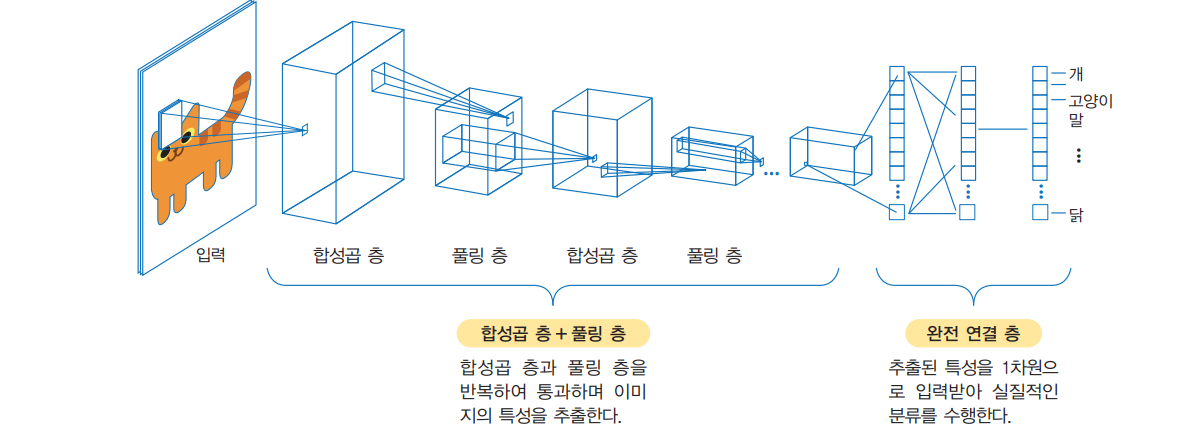

### **(1)합성곱 층**
합성곱 층은 커널과 패딩으로 이루어진다.
합성곱층은 이미지에 필터를 씌우는 과정을 통해 이미지의 특징을 추출한다.



#### **- 커널(kernel)**
- **커널(kernel)**은 행렬로 구성된 가중치(w)이다. **필터(filter)**라고도 부른다.
- 이미지의 좌측 상단부터 커널의 각 위치에 대응되는값과 곱한 것을 더하여 새로운 픽셀의 값을 계산하는 것을 **합성곱연산(Convolution operation)**이라 한다.
- 이런 합성곱연산의 결과로 **특성맵(feature map)**이 생성된다.
- 이미지에 커널을 곱해 만들어진 특성맵은 이미지의 특성을 추출하게 된다.
- 커널이 일정한 간격으로 옮겨가며 순회하는 것을 **스트라이딩(striding)**라고 하고 그 간격을 **스트라이드**라 한다.

- 5 x5 이미지에 3 x 3 커널을 이용해서 1간격으로 스트라이딩하여 만들어진 특성맵.

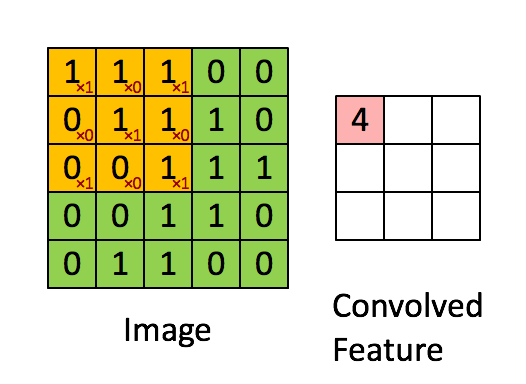

원본이미지


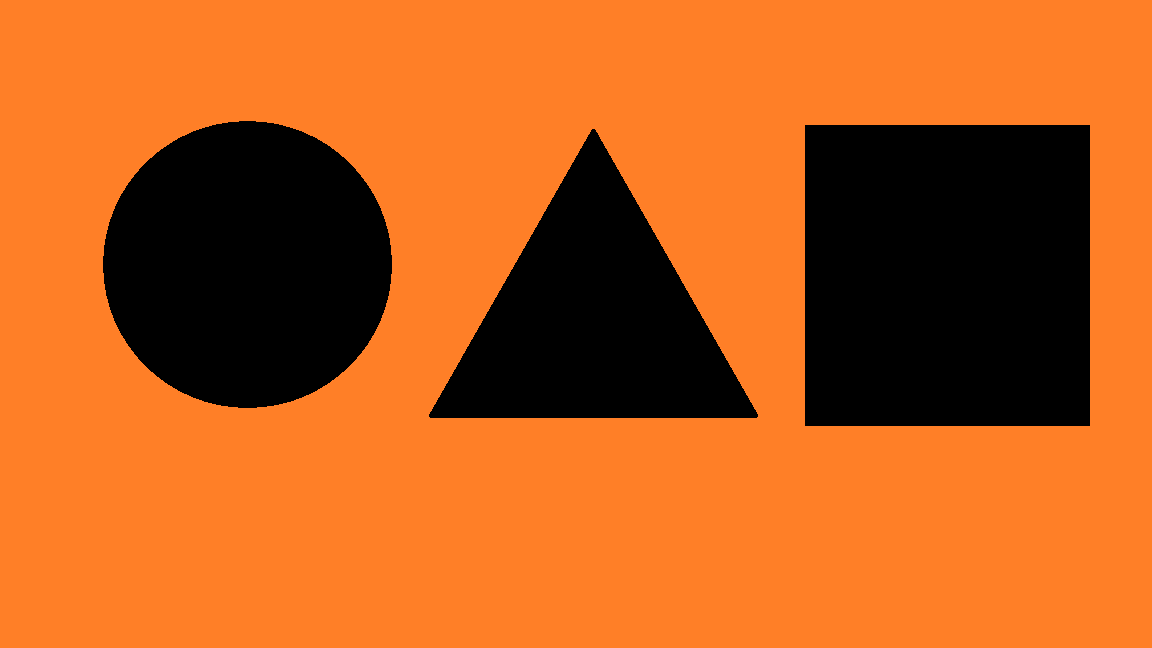


커널을 씌운 이미지


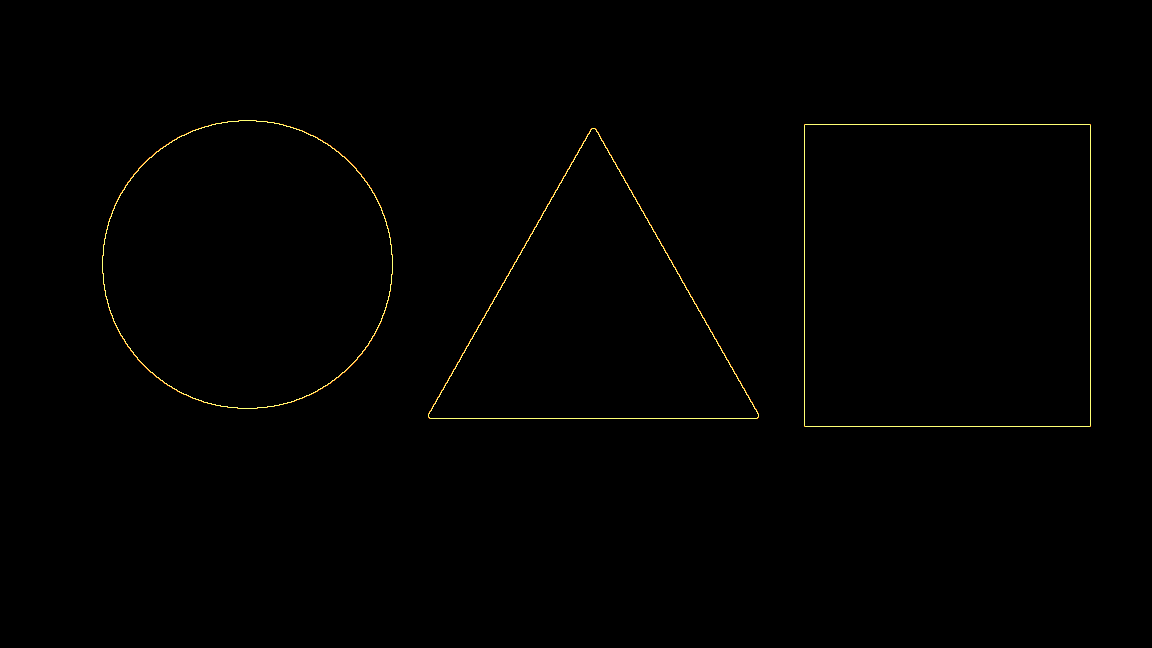

In [ ]:
# 이미지에 커널을 씌워서 출력해보세요. 커널을 씌운 이미지에는 어떤 변화가 생겼나요?

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#원본이미지
print("원본이미지")
img1 = cv2.imread('/content/shape.png')
cv2_imshow(img1)


#커널을 씌운 이미지
print("\n커널을 씌운 이미지")
kernel1 = np.array( [[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]] )

img2 = cv2.filter2D(img1, -1, kernel1)
cv2_imshow(img2)

다양한 이미지 필터를 구경하고 싶다면
☞ https://setosa.io/ev/image-kernels/

keras에서의 합성곱층 알아보기.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

    tf.keras.layers.Conv2D(
        filters,
        kernel_size,
        input_shape = (3차원데이터)
        strides=(1, 1)
    )

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters = 3,                         # 핕터(커널) 3개 사용 선언
                 kernel_size = (3,3),                 # 필터(커널)의 사이즈 3 x 3 사용
                 input_shape = (400, 400, 3),         # 입력 데이터 400 x 400 크기의 RGB 색상 사진 사용
                 strides = (1,1)))                    # 필터(커널)를 이동시키는 간격
print(model.output_shape)                             # 나온 이미지 데이터 크기

(None, 398, 398, 3)


-  합성곱 연산에서 생기는 문제점.
 1. 합성곱 연산을 수행한 결과인 특성맵의 크기는 입력데이터보다 작아진다. 합성곱 연산으로 계속 특성맵이 작아져 더이상 합성곱 연산을 못하게 될 수 있다.

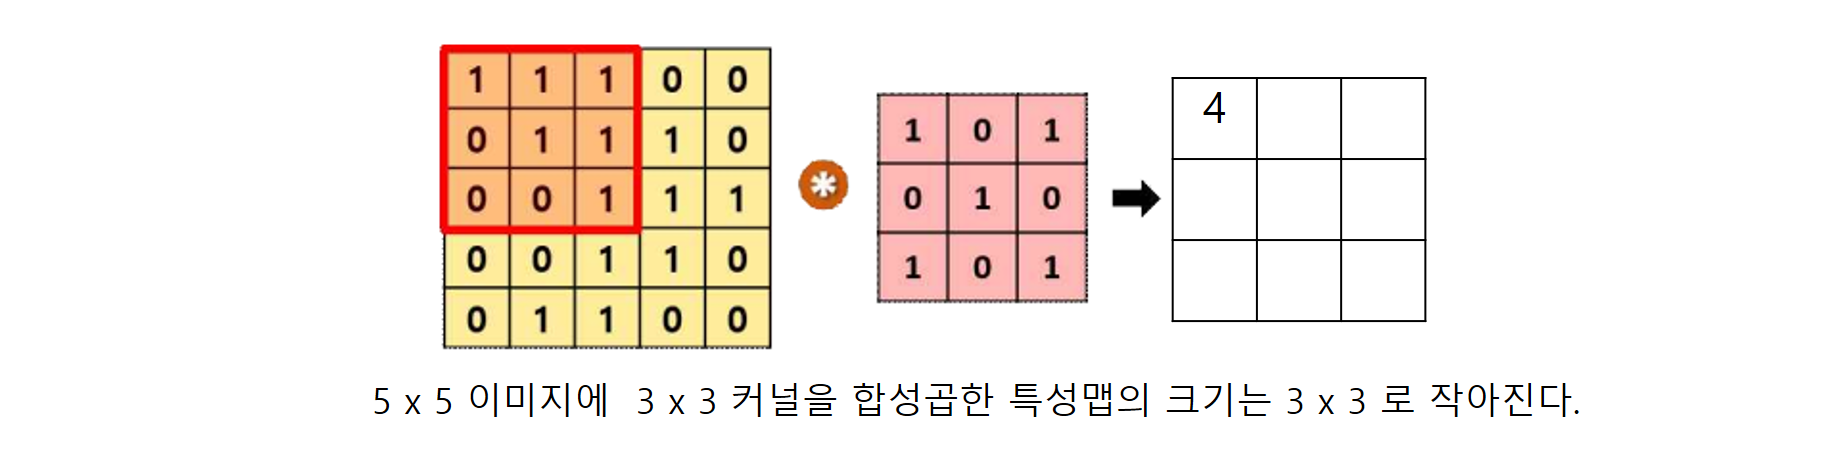
2. 이미지의 가장자리에 위치한 픽셀들의 정보도 점점 사라진다.
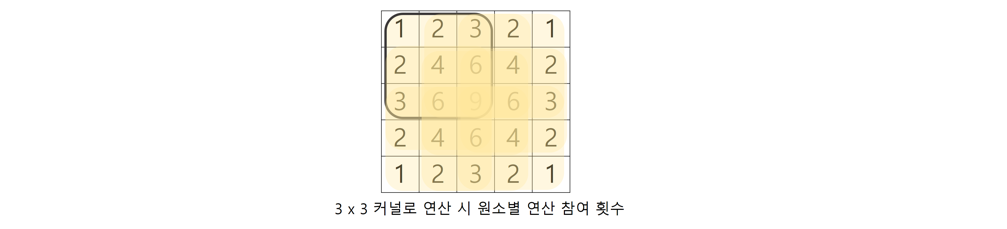

#### **- 패딩(padding)**
 **패딩(padding)**은 입력 데이터의 외각에 지정된 픽셀만큼 특정
값으로 채워 넣는 것으로, 아래의 그림처럼 보통 0을 채워 넣는다.


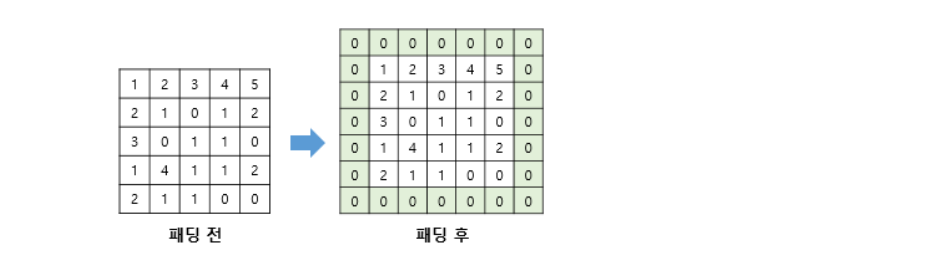

- 모델에 (400, 400, 3) 크기의 입력 데이터를 주입하고 합성곱 연산을 통과한 후의 이미지 사이즈가 어떻게 변화하는지 살펴보자

keras의 패딩 옵션
- 'valid': 패딩을 사용하지 않음.
- 'same': 합성곱 연산 후의 결과를 입력 데이터 사이즈와 동일하도록 패딩을 추가함.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
# 패딩 옵션을 'valid', 'same' 으로 각각 실행해보세요.
#코드에 대한 설명을 주석으로 작성하세요.

# 옵션 설명:
# 'valid': 패딩을 사용하지 않음.
# 'same': 합성곱 연산 후의 결과를 입력 데이터 사이즈와 동일하도록 패딩을 추가함.

# 실행하기 전에 결과가 어떻게 나올지 예상해서 적어보세요.

# 결과:
# valid 는 아까와 같이 데이터 크기가 줄어든 상태로 나올 것 같고,
# same 은 입력 출력 데이터 크기가 같게 나올 것 같다.

model = Sequential()
model.add(Conv2D(input_shape = (400, 400, 3), # 입력데이터의 크기
                 filters = 3,
                 kernel_size = (3,3),
                 strides = (1,1),
                 padding = 'same'))
print(model.output_shape)

# valid = (None, 398, 398, 3)
# same = (None, 400, 400, 3)

(None, 400, 400, 3)


https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

### **(2)풀링 층**
- 풀링 층은 합성곱 층의 출력데이터에서 주요값만 뽑아 크기를 줄이고, 특정 데이터를 강조하는 용도로 사용된다.
- 사소한 변화가 영향을 미치지 않도록 한다.


- 풀링 층을 처리하는 방법으로는 **최대 풀링(Max pooling)**과 **평균 풀링(Average pooling)**이 있다.
- 두 방법은 정사각 행렬의 특정 영역 값의 **최댓값을 구하거나 특정 영역의 평균을 구하는 방식**으로 동작한다.

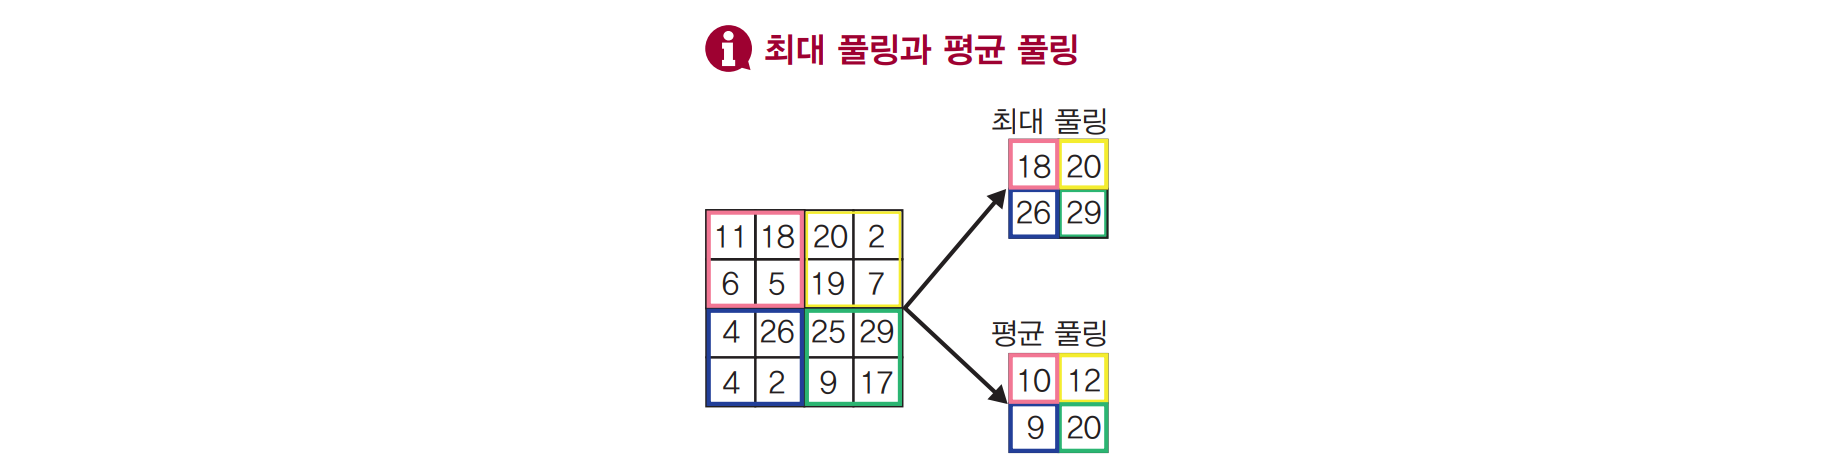

- 일반적으로 풀링의 크기와 스트라이드를 같은 크기로 설정하여 모든 원소가 한 번씩 처리되도록 설정한다.

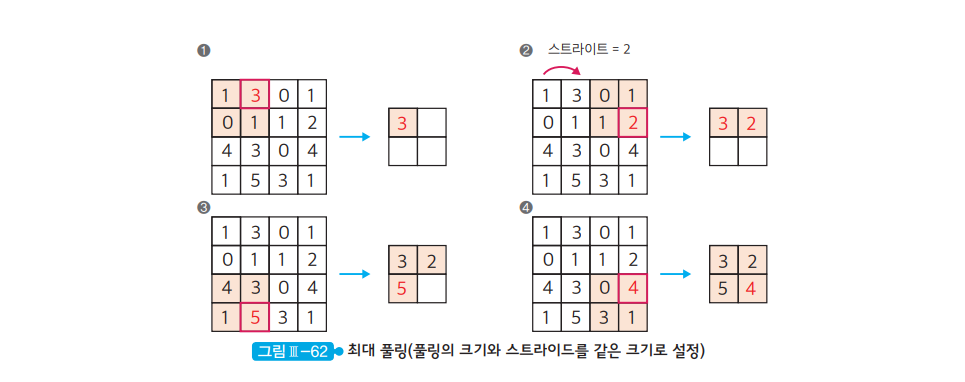

- 아래의 그림에서 데이터가 오른쪽으로 1칸 이동하더라도 풀링 연산의 결과는 동일하다는 것을 볼 수 있다.
- 즉, 고양이의 눈이 어디에 위치하든 눈이라는 특성을 인식할 수 있듯이 풀링을 이용하면 불변성을 찾아내어 공간적 변화를 극복할 수 있다

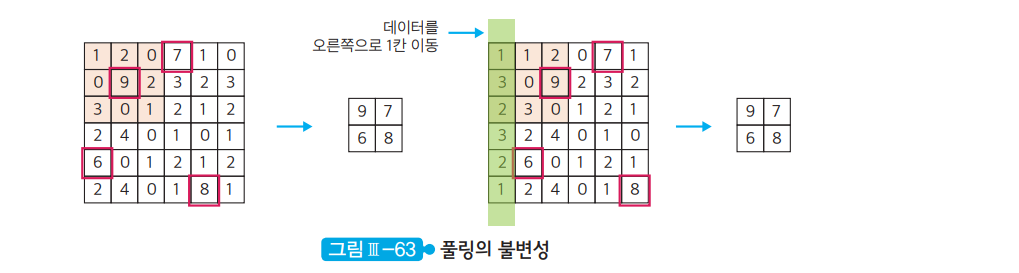

- 이미지의 작은 변화가 특징을 추출할 때 큰 영향을 미치지 않는다.

(ex) 사람마다 눈,코,입 위치가 다르지만 이 차이가 사람이라고 인식하는데 있어서 영향을 미치지 않음.

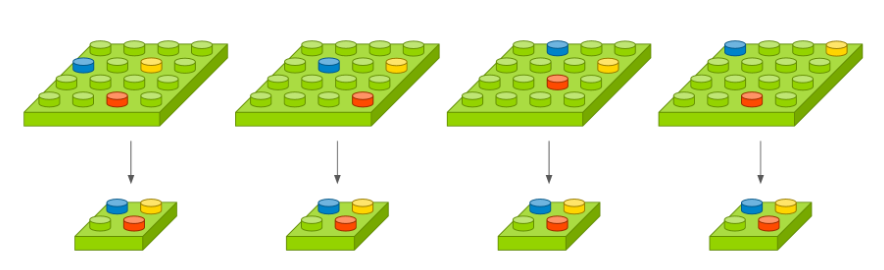

In [ ]:
# 1. 코드에 대한 설명을 주석으로 작성하세요.
# 2. 실행결과를 예상하고 결과가 나온 이유에 대해 작성해보세요.

# 라이브러리 불러오기
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

# 모델 선언
model = Sequential()

# 모델의 첫번째 층에 Conv2D 필터층 추가
model.add(Conv2D(input_shape = (400,400,3),
                 filters = 3,
                 kernel_size = (3,3),
                 strides = (1,1),
                 padding = 'same' ))

# 만들어진 모델의 출력 형태 확인
print(model.output_shape)

# 모델의 두번째 층에 MaxPooling2D 필터 층 추가
model.add(MaxPooling2D(pool_size = (2,2))) # 2 x 2 만큼의 범위로 여러개를 쪼개서 그 중 제일 큰 값들로 만들어진 아웃풋 만들기

# 만들어진 모델의 출력 형태 확인
print("2*2로 풀링한 특성맵 크기:", model.output_shape)

(None, 400, 400, 3)
2*2로 풀링한 특성맵 크기: (None, 200, 200, 3)


## 2.합성곱 신경망으로 이미지 분류 문제 해결하기
합성곱 신경망을 구성하기 위하여 합성곱 연산과 풀링 연산을 배치한 후, 이미지의 특성 맵이 추출된 결과를 완전 연결망에 주입한다.


#### 데이터 가져오기 및 전처리

In [ ]:
#아래 코드에 대한 설명을 주석으로 작성해보세요.
# 분류할 데이터 cifar10 데이터 파일 가져오고 받아온 데이터를 각각 (x, y) train, (x, y) test 에 저장

import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# x_train 과 x_test 의 둘쑥날쑥한 데이터들을 0 ~ 1 범위로 만들기 위해 값의 최대값으로 나누어 정형화 시키는 과정
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# 정수형(integer) 클래스 레이블(label)을 원-핫 인코딩(one-hot encoding) 벡터로 변환하는 과정
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#### 합성곱 신경망 모델 구성

In [ ]:
 #모델을 구성하기 전에 input데이터 크기와 output데이터 크기를 설정하세요.
# x_train.shape, y_train.shape = ((50000, 32, 32, 3), (50000, 10))

input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# 단순한 CNN 모델

def simple_CNN_model():
    # 모델 구성
    model = Sequential()

    # 모델의 첫 층에 합성곱 층 추가
    model.add(Conv2D(32,                                # 필터 갯수
                    (3, 3),                             # 커널(필터) 사이즈 설정
                     padding = 'same',                  # 합성곱 후에도 입력, 출력 데이터가 같게 설정
                     activation = 'relu',               # x = y 그래프를 activation으로 설정하여 음수는 0으로 출력하고 양수는 그대로 출력하여 출력된 데이터의 손실을 줄이기 위해 사용하는 relu 함수
                     input_shape = input_shape))        # 입력 형태를 ( 32, 32, 3 ) 으로 설정
    model.add(Conv2D(32, (3, 3), activation = 'relu'))

    # 3번째 층에 2 x 2 의 범위로 쪼개서 가장 큰 값을 각각 나타내주는 최대 풀링 층 추가
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # 4번째 층에 입력 데이터를 1차원으로 평탄화하는 층 추가
    model.add(Flatten())

    # 5번째 층에 가중치를 가지는 완전연결망 Dense 층 추가 + relu 설정
    model.add(Dense(512, activation = 'relu'))

    # 6번째 출력 층에 출력 형태 ( 10 ) 지정 및 다중분류에 사용되는 softmax 함수를 사용하여 각 클래스에 속할 확률을 추정하여 나타내주는 함수
    model.add(Dense(num_classes, activation = 'softmax'))

    # 모델 환경 설정 ( 모델이 효과적으로 구현될 수 있게 여러 가지 환경을 설정해 주면서 컴파일하는 부분이다. )
    model.compile(loss = 'categorical_crossentropy',         # 출력을 클래스 소속 확률에 대한 예측으로 이해할 수 있는 문제에서 사용 ( 다중 분류에서 사용 )

                  optimizer = 'RMSprop',                     # Adagrad 의 보완된 버전으로 지속적으로 변화하던 parameter는 최적값에 가까워졌을것이고
                                                             # 한 번도 변하지 않은 parameter는 더 큰 변화를 줘야한다는 것이 Adagrad의 개념이다.
                                                             # 하지만 학습이 지날수록 변화의 폭이 줄어들어 학습이 힘들다는 단점이 있는데, 지수이동평균을 적용하여
                                                             # 최근에 업데이트한 양을 고려하여 습의 최소 step은 유지할 수게 보완하였다.

                  metrics = ['accuracy'])                    # 모델을 평가하기 위해 설정, accuracy 는 타겟 대비 정확히 예측한 비율을 정의
    return model

# 함수 호출을 통한 모델 생성
model2 = simple_CNN_model()

In [ ]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               3686912   
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                     

### 합성곱 신경망 학습

In [ ]:
#early stopping 은 monitor 하는 지표의 값의 개선이 없을때 (지정 횟수(patience) 이상) 모델의 훈련을 멈추게 합니다.
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss',          # monitor는 EarlyStopping 의 기준이 되는 값을 입력합니다.
                                                              # 만약 'val_loss'를 입력하면 val_loss가 더이상 감소되지 않을 경우 EarlyStopping을 적용.

                               patience = 5)                  # patience는 Training이 진행됨에도 더이상 monitor되는 값의 개선이 없을 경우,
                                                              # 최적의 monitor 값을 기준으로 몇 번의 epoch을 진행할 지 정하는 값 5로 설정시 5번동안 개선이 안되면 그만두기

In [ ]:
# 모델 학습 진행하기
history2 = model2.fit(x_train,
                      y_train,
                      batch_size = 200,
                      epochs = 30,
                      validation_data = (x_test, y_test),
                      callbacks = [early_stopping])          # callbacks는 과적합을 방지하기 위해서 사용.
                                                             # EarlyStopping 이라는 콜백함수를 사용하면 에포크를 30으로 지정하더라도 콜백함수에서 설정한 조건을 만족하면 학습을 조기 종료시킬 수 있다.

Epoch 1/30
250/250 [==============================] - 4s 13ms/step - loss: 1.7119 - accuracy: 0.3892 - val_loss: 1.3533 - val_accuracy: 0.5162
Epoch 2/30
250/250 [==============================] - 3s 11ms/step - loss: 1.2709 - accuracy: 0.5539 - val_loss: 1.1255 - val_accuracy: 0.6040
Epoch 3/30
250/250 [==============================] - 3s 11ms/step - loss: 1.0445 - accuracy: 0.6342 - val_loss: 1.0059 - val_accuracy: 0.6488
Epoch 4/30
250/250 [==============================] - 2s 10ms/step - loss: 0.8758 - accuracy: 0.6968 - val_loss: 1.0434 - val_accuracy: 0.6334
Epoch 5/30
250/250 [==============================] - 3s 11ms/step - loss: 0.7232 - accuracy: 0.7487 - val_loss: 1.1092 - val_accuracy: 0.6231
Epoch 6/30
250/250 [==============================] - 3s 10ms/step - loss: 0.5786 - accuracy: 0.8009 - val_loss: 1.0315 - val_accuracy: 0.6640
Epoch 7/30
250/250 [==============================] - 3s 10ms/step - loss: 0.4235 - accuracy: 0.8555 - val_loss: 1.0520 - val_accuracy: 0.6750

### 합성곱 신경망 평가


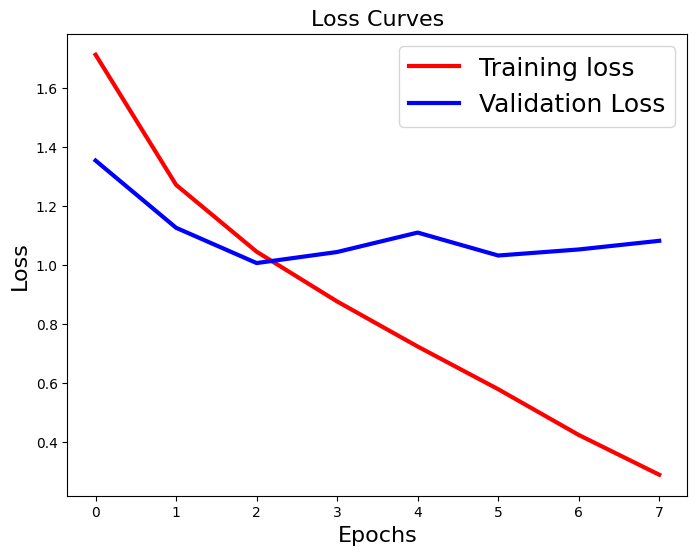

In [ ]:
# 손실값 그래프 그리기
import matplotlib.pyplot as plt

def loss_graph(history):
    # 손실값 그래프 그리기
    plt.figure(figsize = [8,6])
    plt.plot(history.history['loss'],'r',linewidth = 3.0)
    plt.plot(history.history['val_loss'],'b',linewidth = 3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize = 18)
    plt.xlabel('Epochs',fontsize = 16)
    plt.ylabel('Loss',fontsize = 16)
    plt.title('Loss Curves',fontsize = 16)

loss_graph(history2)

In [ ]:
# 테스트 데이터로 모델 평가하기
def evaluate_model(model):
    scores = model.evaluate(x_test, y_test, verbose = 0)
    print('모델 에러율: %.2f%%' % (100 - scores[1] * 100))
evaluate_model(model2)

모델 에러율: 31.33%


### 합성곱 신경망 개선
**합성곱 연산 층과 풀링 층을 추가**하여 특성 맵을 추출하는 과정을 정교화해 보자. 더
욱 깊어진 합성곱 신경망으로 학습한 결과는 개선되었는가?

In [ ]:
# 개선된 CNN 모델
# 아까의 CNN모델과 어떤 변화가 있는지 찾아보세요.
# 합성곱 연산 층과 풀링층이 추가로 늘었다.

def Larger_CNN_model():
    # 모델 구성
    model = Sequential()

    # 합성곱 층 및 최대풀링층 설정
    model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # 입력 데이터의 특징을 더욱 뽑아내기 위해 두번째 합성곱 층 및 최대풀링층 설정( 첫 층과 다른 점은 32 -> 64개의 층 설정으로 바꾸었다. )
    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # 입력 데이터를 1차원으로 평탄화하는 층 추가
    model.add(Flatten())

    # 가중치를 가지는 완전연결망 Dense 층 추가 + relu 설정
    model.add(Dense(512, activation = 'relu'))

    # 가중치를 가지는 완전연결망 Dense 층 추가 (출력층) 출력 클래스 10개 설정 및 softmax 설정 으로 다중분류에 사용 ( 각 클래스에 확률을 매김 )
    model.add(Dense(num_classes, activation = 'softmax'))

    # 모델 컴파일하기
    model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
    return model

In [ ]:
# 모델 3을 새로 개선 (합성곱 신경망 추가) 한 모델로 선언
model3 = Larger_CNN_model()
# 선언된 모델 3 요약 통계 보기
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                 

In [ ]:
# 모델 학습 및 학습된 history 저장
history3 = model3.fit(x_train,
                      y_train, batch_size = 200,
                      epochs = 30,
                      validation_data = (x_test, y_test),
                      callbacks = [early_stopping])

Epoch 1/30
250/250 [==============================] - 6s 17ms/step - loss: 1.8057 - accuracy: 0.3505 - val_loss: 1.4442 - val_accuracy: 0.4799
Epoch 2/30
250/250 [==============================] - 3s 14ms/step - loss: 1.3559 - accuracy: 0.5187 - val_loss: 1.1548 - val_accuracy: 0.5937
Epoch 3/30
250/250 [==============================] - 4s 14ms/step - loss: 1.1105 - accuracy: 0.6078 - val_loss: 1.2724 - val_accuracy: 0.5817
Epoch 4/30
250/250 [==============================] - 4s 17ms/step - loss: 0.9215 - accuracy: 0.6790 - val_loss: 0.8854 - val_accuracy: 0.6986
Epoch 5/30
250/250 [==============================] - 4s 16ms/step - loss: 0.7672 - accuracy: 0.7344 - val_loss: 0.8338 - val_accuracy: 0.7134
Epoch 6/30
250/250 [==============================] - 4s 17ms/step - loss: 0.6354 - accuracy: 0.7802 - val_loss: 0.8042 - val_accuracy: 0.7267
Epoch 7/30
250/250 [==============================] - 3s 14ms/step - loss: 0.5121 - accuracy: 0.8226 - val_loss: 0.7987 - val_accuracy: 0.7330

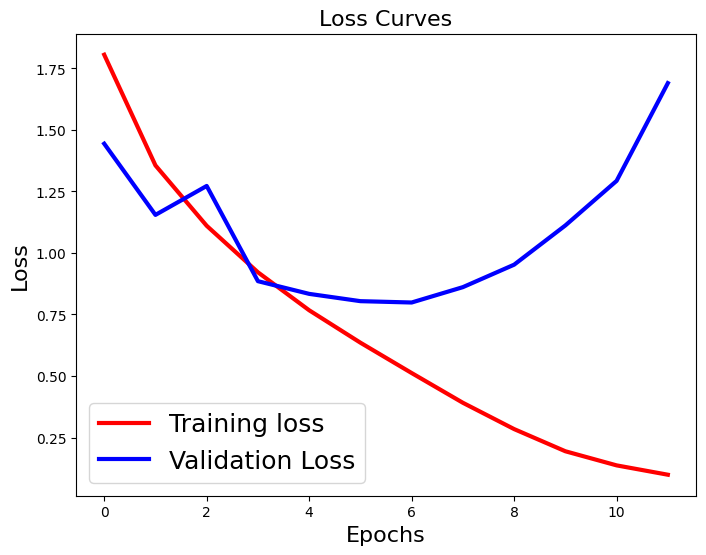

In [ ]:
# 모델 3의 loss_graph 그리기
loss_graph(history3)

In [ ]:
# 모델 3의 에러율 출력
evaluate_model(model3)

모델 에러율: 30.85%


# 오늘의 정리
각 질문에 대한 답을 1줄로 정리해보세요!
1. 합성곱연산이란? : 이미지에 필터를 씌우는 과정을 통해 이미지의 특징을 추출하는 연산
2. 커널이란? : 행렬로 구성된 가중치(w)
3. 패딩이란? : 합성곱 연산을 데이터 마다 고루 하기 위해 데이터에 두르는 무의미한 값
4. 풀링이란? : 데이터의 중요값만 뽑아 크기를 줄이고, 특정 데이터를 강조하는 연산
5. 스트라이드란? : 필터(커널)를 이동시키는 간격
6. 느낀점 또는 배운점: 합성곱 층과 풀링층을 여러번 사용하여 에러율을 줄일 수 있다는 사실을 알았고, EarlyStopping 이라는 함수를 통하여 학습 중 개선이 없을때 조기 중단 시킬 수 있다는 사실을 깨달았다.

